In [97]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib


import sys
sys.path.append("../src")

import feature_engineering as fe
import data_preprocessing as dp
import random_forest_train as rft

importlib.reload(rft) 
from random_forest_train import RandomForest

In [98]:
path_to_df = "../data/raw/atp_tennis.csv"
path_to_df_processed = "../data/processed/atp_tennis_processed.csv"

df = pd.read_csv(path_to_df)
df_processed = df.copy()

In [99]:
df_processed = fe.process_features(df_processed)

In [100]:
df_processed, X_train, y_train, X_test, y_test, label_encoders = dp.preprocess_data(df_processed)

PREPROCESSING DATA

1. Dropping unusable columns...
   Remaining columns: 61

2. Encoding categorical variables...
Creating unified player encoder...
  Total unique players: 1769
  Encoded range: 0 to 1768
  Encoded 'Tournament': 267 unique values
  Encoded 'Series': 8 unique values
  Encoded 'Court': 2 unique values
  Encoded 'Surface': 4 unique values
  Encoded 'Round': 8 unique values

Validating encoding consistency...
  ✓ All 66279 rows have consistent winner encoding
  Player_1 encoding range: (0, 1767)
  Player_2 encoding range: (1, 1768)
  Winner encoding range: (0, 1767)

Splitting data by date: 2024-01-01
  Training set: 61562 matches (2000-01-03 00:00:00 to 2023-12-31 00:00:00)
  Test set: 4717 matches (2024-01-01 00:00:00 to 2025-09-23 00:00:00)

Label encoders saved to: ../data/labels/label_encoders.pkl

3. Defining features and target...
   X_train shape: (61562, 59)
   X_test shape: (4717, 59)
   y_train distribution: 0=30781, 1=30781
   y_test distribution: 0=2358, 1=23

In [ ]:
# Define numeric columns

numeric_cols = df_processed.select_dtypes(include=np.number).columns

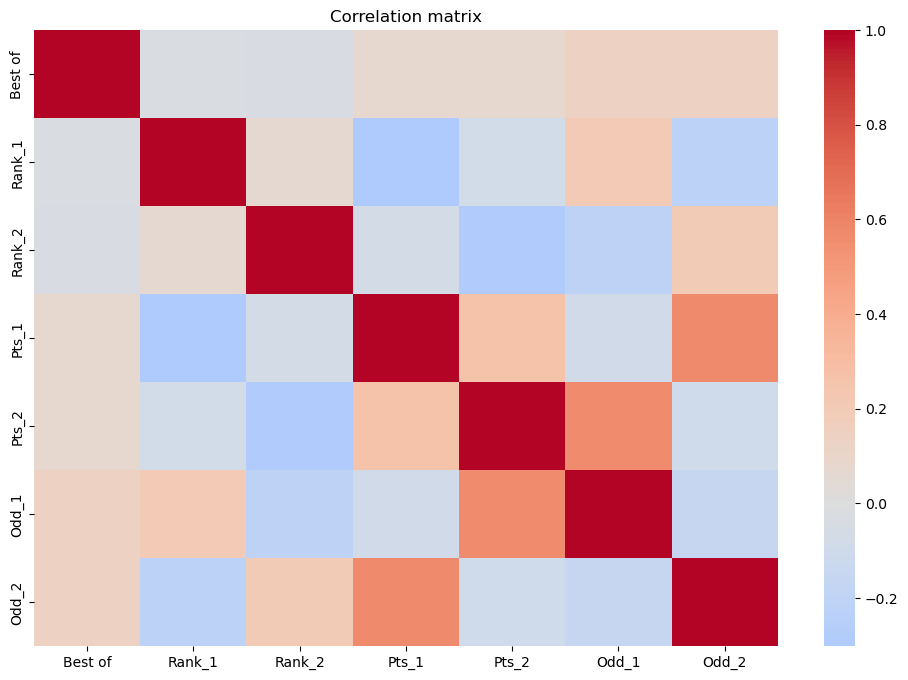

In [ ]:
# Plot Correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df_processed[numeric_cols].corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Correlation matrix")
plt.show()

In [103]:
df_processed.to_csv(path_to_df_processed, index=False)

DATA INFORMATION
Training Set:
  Samples:                61562
  Features:               59
  Class Distribution:
    Class 0 (Player 2):   30781 (50.00%)
    Class 1 (Player 1):   30781 (50.00%)

Test Set:
  Samples:                4717
  Features:               59
  Class Distribution:
    Class 0 (Player 2):   2358 (49.99%)
    Class 1 (Player 1):   2359 (50.01%)

Total Samples:            66279
Train/Test Split:         92.88% / 7.12%

TRAINING MODEL
Training Bagging Random Forest model...


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    3.5s remaining:   17.7s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    3.7s finished


Training completed!



[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.2s remaining:    1.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.2s remaining:    1.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


PERFORMANCE METRICS

1. ACCURACY METRICS
----------------------------------------------------------------------
Training Accuracy:        0.8576 (85.76%)
Test Accuracy:            0.6799 (67.99%)
Out-of-Bag (OOB) Score:   0.7070 (70.70%)
Overfitting Gap:          0.1777

2. PRECISION, RECALL, F1-SCORE
----------------------------------------------------------------------
                    Training Set    Test Set
Precision:          0.8552          0.6815
Recall:             0.8609          0.6757
F1-Score:           0.8580          0.6786

3. ROC-AUC SCORE
----------------------------------------------------------------------
Training ROC-AUC:         0.9428
Test ROC-AUC:             0.7456

4. PRECISION-RECALL AUC
----------------------------------------------------------------------
Training PR-AUC:          0.9457
Test PR-AUC:              0.7373

5. CONFUSION MATRIX (Test Set)
----------------------------------------------------------------------

                Predicted
     

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    8.8s remaining:   44.1s
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    9.2s remaining:   46.0s
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    9.3s remaining:   46.7s
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    9.4s remaining:   46.9s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    9.7s finished
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    9.3s remaining:   46.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    9.8s finished
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    9.8s finished
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed: 

ACCURACY    : 0.6789 (+/- 0.0143)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    9.1s remaining:   45.5s
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    9.7s remaining:   48.3s
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    9.9s remaining:   49.5s
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:   10.1s remaining:   50.4s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   10.1s finished
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:   10.1s remaining:   50.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   10.2s finished
[Parallel(n_jobs=12)]: Done  12 out of  12 

PRECISION   : 0.6819 (+/- 0.0164)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    4.5s remaining:   22.7s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    5.5s finished
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    7.9s remaining:   39.5s
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    8.3s remaining:   41.7s
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    8.1s remaining:   40.6s
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    8.1s remaining:   40.3s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    8.7s finished
[Parallel(n_jobs=12)]: Done  12 out of  12 

RECALL      : 0.6713 (+/- 0.0123)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    5.9s remaining:   29.3s
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    6.7s remaining:   33.3s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    6.8s finished
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    7.2s finished
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed

F1          : 0.6765 (+/- 0.0133)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    7.7s remaining:   38.3s
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    8.1s remaining:   40.3s
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    8.1s remaining:   40.7s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    8.4s finished
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    8.5s finished
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    8.7s finished
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    6.9s remaining:   34.7s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    7.5s finished
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    6.9s re

ROC_AUC     : 0.7467 (+/- 0.0139)

Plot saved to: bagging_rf_metrics.png

MODEL SUMMARY
Model Type:               Bagging Random Forest
Number of Estimators:     200
Max Samples per Tree:     0.8
Max Features per Tree:    0.8
Bootstrap Sampling:       True
Base Estimator:           Decision Tree
  - Max Depth:            15
  - Min Samples Split:    5
  - Feature Sampling:     sqrt

Data Split:
  Training Samples:       61562
  Test Samples:           4717
  Number of Features:     59

Performance:
  Test Accuracy:          0.6799
  Test F1-Score:          0.6786
  Test ROC-AUC:           0.7456
  OOB Score:              0.7070


{'train_accuracy': 0.8575744777622559,
 'test_accuracy': 0.6798812804748781,
 'oob_score': 0.7070108183619765,
 'train_precision': 0.8552202678715507,
 'test_precision': 0.6814878153056861,
 'train_recall': 0.8608882102595757,
 'test_recall': 0.675710046629928,
 'train_f1': 0.8580448790596769,
 'test_f1': 0.6785866326096212,
 'train_roc_auc': 0.9428369170217947,
 'test_roc_auc': 0.7455927365320982,
 'train_pr_auc': 0.9457071860472018,
 'test_pr_auc': 0.7372683527057734,
 'confusion_matrix': array([[1613,  745],
        [ 765, 1594]])}

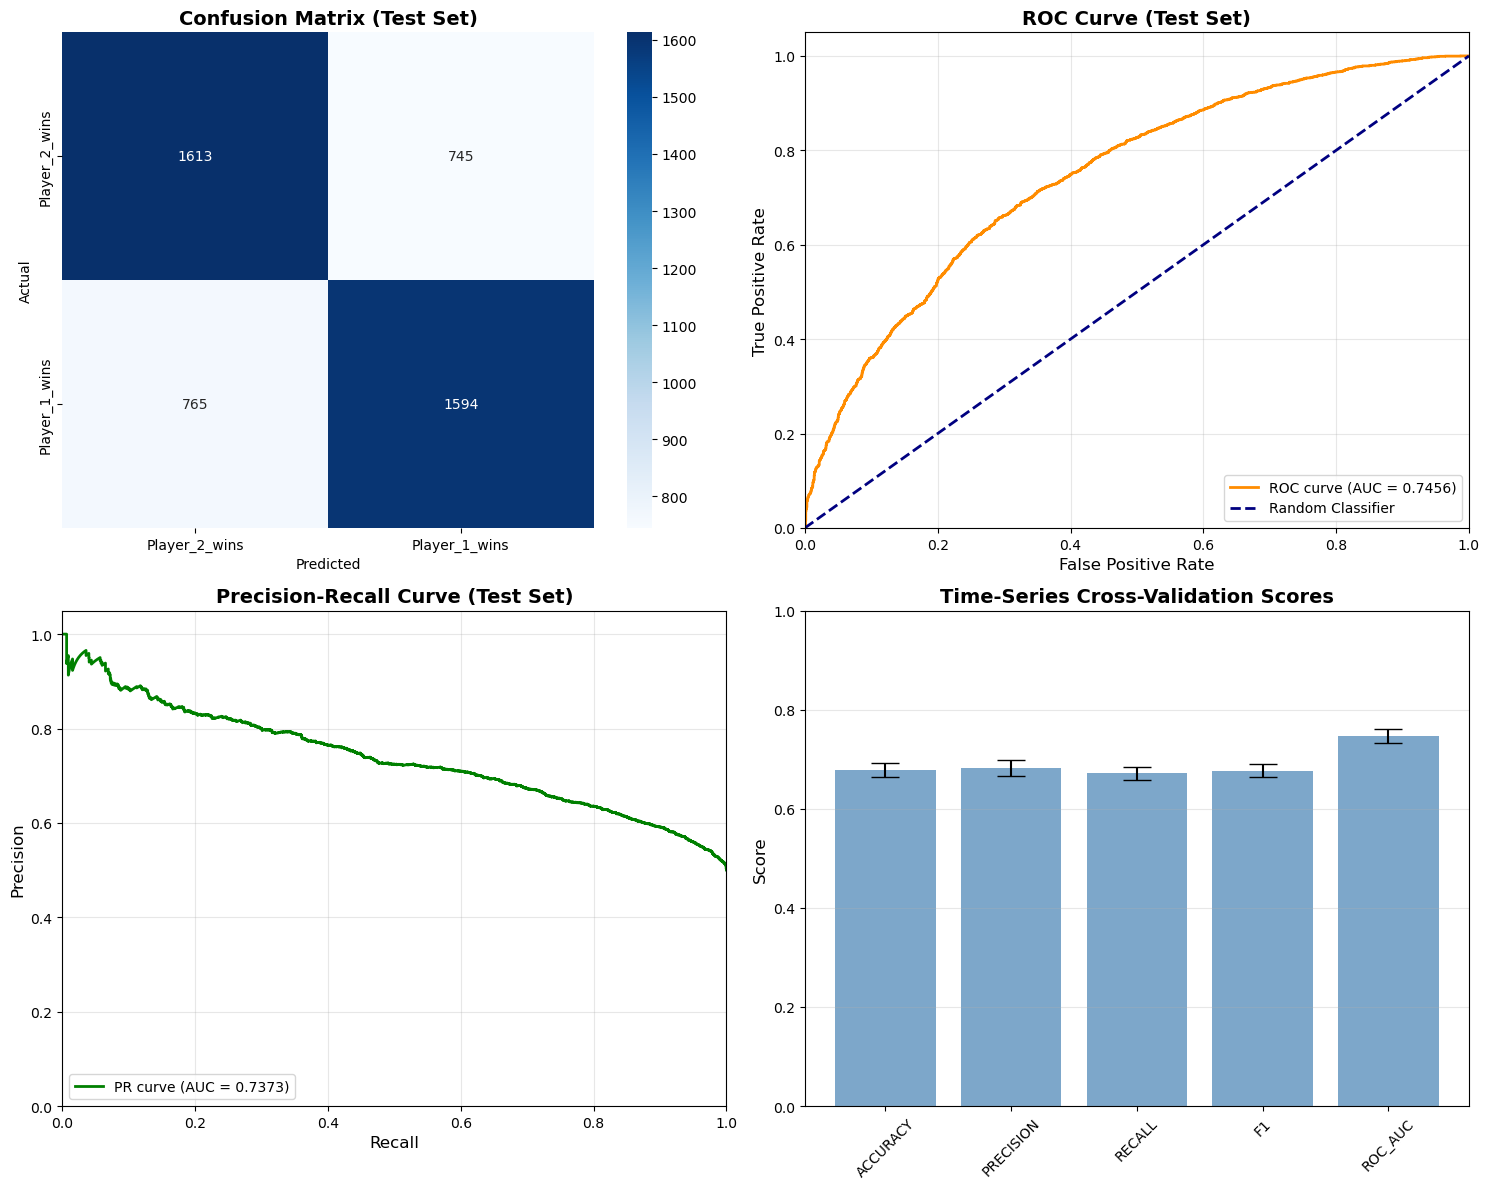

In [104]:
random_forest = RandomForest(X_train, y_train, X_test, y_test)
random_forest.run_full_pipeline()
